# U20690/M361 Financial Derivative Pricing

# Coursework Q4, Q5

- Answer ALL questions.
- This is an INDIVIDUAL coursework.
- This must be all your own work.

### INSTRUCTIONS

- Test your functions to ensure that they perform the required calculations correctly.

- Functions that are unused/untested won’t gain full marks.

- Give variables and functions meaningful names.

- Make your code clear.

- Bracket expressions only where needed; do not use extra redundant brackets.

- You may choose to split large tasks or functions into
smaller pieces, each of which performs a well-defined part of the
calculation.  (However, don't overdo this!  Only introduce smaller
functions if they perform a well-defined task and make the program
clearer.)

- Where appropriate, you should always **use** functions
that you have already defined earlier in your answers, to help with
later questions, rather than duplicating code.

- Your answers will be compared carefully; ensure that you do the work yourself.

- You must use the techniques taught in the unit.  Searching for answers on the web, that will use different techniques and styles, will not gain marks and will incur severe penalties and/or disciplinary action for cheating.

- Where explanations are required, type them into text/markdown cells or add them as clear comments in code cells.  You may wish to use LaTeX if you want, but this is not expected; the main thing is that your working is clear.

- Coursework submission will be electronic: see the Moodle page.

### STUDENT REFERENCE NUMBER

Type your 6-digit student reference number in place of `xxxxxx` in the following cell:

In [1]:
# 902897

#### QUESTION 4 [25 MARKS]

You may use the following functions for the normal probability density function (PDF), $\varphi(x)$, and cumulative distribution function (CDF), $\Phi(d)$:

In [2]:
import numpy as np
import scipy.special

def phi(x):
    return np.exp(-0.5*x**2)/np.sqrt(2*np.pi)
    
def Phi(d):
    return 0.5*(1 + scipy.special.erf(d/np.sqrt(2)))

##### Q4(a)

A **ramp option**, $R$, has payoff function

$$
R_T=
\left\{\begin{array}{ll}
0 & \mbox{if $S_T>K$,}\\
S_T & \mbox{otherwise,}
\end{array}\right.
$$

Write a python function that computes this payoff as a function of the final price $S_T$ and the strike $K$.

[Hint: you may use the function np.where(A, B, C) in which A is a logical condition (true/false expression), and B and C are the desired results in the cases where A is true or false, respectively. As an example, the payoff of a call option is written in this form, below.]

In [3]:
def call_payoff(ST, K):
    CT = np.where(ST > K, ST-K, 0)
    return CT

In [10]:
def ramp_payoff(ST, K):
    RT = np.where(ST > K, 0, ST)
    return RT

In [72]:
print(ramp_payoff(5, 3))
print(ramp_payoff(2, 7))
print(ramp_payoff(4, 4))

0
2
4


**Q4(b)**

Write a function to calculate the fair price, $R_0$, of the ramp option, using the formula

$$
R_0 = S_0\Phi(-d_1)
$$

Define any other helpful functions that you need.

In [7]:
def calculate_d1(S0, K, r, sigma, T):
    d1 = (np.log(S0/K)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
    return d1

In [5]:
def ramp_price(S0, K, r, sigma, T):
    d1 = calculate_d1(S0, K, r, sigma, T)
    R0 = S0*Phi(-d1)
    return R0

In [74]:
print(ramp_price(100,90, 0.05, 0.2, 12))

8.620349627072205


**Q4(c)**

Produce a figure that contains graph of $R_0$ against $S_0$ for $T=10$ ,$T=1$, $T=0.1$, for fixed (reasonable) values of the other parameters and compare these with a graph of the payoff function and the graph of $S_0$ itself.  Identify the effects of $T$ and $S_0$ on the value $R_0$ and explain why they occur in terms of asset paths and their payoffs.

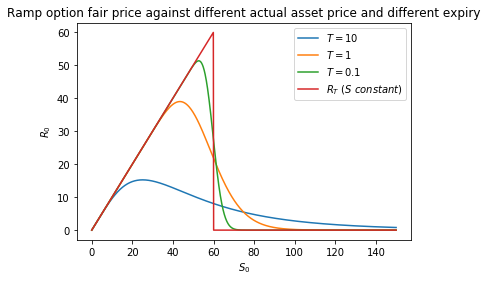

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

K, r, sigma = 60, 0.05, 0.2
S0 = np.linspace(0.01, 150, 1000)
RT = ramp_payoff(S0, K)
plt.figure()
for T in 10, 1, 0.1:
    R0 = ramp_price(S0, K, r, sigma, T)
    plt.plot(S0, R0, label='$T=%s$'%T)
plt.plot(S0, RT, label='$R_T\ (S\ constant)$')
plt.xlabel(r'$S_0$')
plt.ylabel(r'$R_0$')
plt.title(r'Ramp option fair price against different actual asset price and different expiry')
plt.legend() 
plt.show()

In [11]:
#Considering specific values set for r and sigma, we can see that increase in actual asset 
#price(S0) increases the fair price of the ramp option(R0). However, it starts to drop
#(finally 0) when S0 is getting closer to the strike price(K) as the payoff of ramp option at 
#expiry (RT) is 0 for asset price at expiry (ST) greater than K. S0 closer to K increases
#the risk that asset price path crosses the strike price and stay higher, leaving 0 payoff.
#Expiry (T) flattens the curve of the ramp option price more as it gets greater, there is more
#time for asset price path to change either way of K, leaving 0 or ST payoff. 

#### Q4(d)

You may make use of the following code from the labs.

In [12]:
import numpy as np

def wiener(T, n):
    t, dt = np.linspace(0, T, n, retstep=True)
    Rz = np.random.normal(0, 1, size=n)
    Rz[0] = 0.0
    C = np.cumsum(Rz)
    w = dt**0.5*C
    return t, w

def abm(x0, alpha, beta, T, n):
    t, w = wiener(T, n)
    x = x0 + alpha*t + beta*w
    return t, x

def gbm(S0, mu, sigma, T, n):
    x0, alpha, beta = np.log(S0), mu-0.5*sigma**2, sigma
    t, x = abm(x0, alpha, beta, T, n)
    s = np.exp(x)
    return t, s

Write a function that performs the Monte Carlo method for estimating the option price,

\begin{eqnarray}
V_0
&=& e^{-rT}\mathbb{E}_{\mathcal{Q}}[V_T|S_0]\\
&\simeq& e^{-rT}\frac{1}{m}\sum_{j=0}^{m-1}f(\underline{S}^{(j)}).
\end{eqnarray}

given a payoff function $f$ that is a function of the whole path $\underline{S}$ taken by the asset.  Your function should compute the discounted average payoff over $m$ GBM paths, each path having $n$ time-values.  An outline is provided below.

In [13]:
def monte_carlo(S0, r, sigma, T, n, m, path_payoff_function):
    # ...your code here...
    total = 0.0
    for j in range(m):# m-number of loops(0 to m-1)
        S = gbm(S0, r, sigma, T, n)[1]# calculates single risk neutral walk, taking second
        VT = path_payoff_function(S)  # output of the gbm function([1]), than uses predefined
        total = total + VT            # payoff function to get payoff value for each loop and  
                                      # sums them up together giving 'total'
    discounted_mean_payoff = np.exp(-r*T)*total/m# total/m gives average payoff, then it is discounted
    return discounted_mean_payoff

Test that your Monte Carlo function works by using it to price a ramp option.  [Hint: you will need to write a path-payoff function for the ramp option, that takes the whole path $\underline{S}$ and the strike $K$ as inputs.  You should also make a suitable factory function.]

In [96]:
def ramp_path_payoff(S, K):
    return ramp_payoff(S[-1],K)# uses ramp option predefined earlier, taking last element of 
                               #path S

def make_ramp_path_payoff(K):#creates factory function which depend on path S only
    def f(S):
        return ramp_path_payoff(S, K)
    return f

S = np.array([100, 95, 105, 80])
print(make_ramp_path_payoff(90)(S))#K=90
print(make_ramp_path_payoff(70)(S))#K=70

80
0


In [78]:
S0, r, sigma, T, n, m = 100, 0.05, 0.2, 10, 1000,100
K = 90
path_payoff_function = make_ramp_path_payoff(K)
monte_carlo(S0, r, sigma, T, n, m, path_payoff_function)

8.887279506672936

#### QUESTION 5 [25 MARKS]

#### Q5(a)

An Overflow Option, $Q$, is an option with a special asset value, $L$, called the *level*, such that $L>S_0$.  The payoff for an overflow option, given an asset path $\underline{S}$, is determined by whether the share price ever rises above the level $L$, in which case the option gives zero payoff no matter what happens to the price of $S$  afterwards, otherwise the payoff is simply that of a ramp option.

The payoff function for the overflow option is therefore given by

$$
Q_T = \left\{
\begin{array}{ll}
0 & \mbox{if $\max(\underline{S}) \ge L$,}\\
R_T & \mbox{otherwise.}
\end{array}
\right.
$$

Write a suitable Python function for the path-payoff.  State which `numpy` function you have used for the $\max$ in the above and why.  Write a factory function for making overflow payoff functions that depend on the path $\underline{S}$ only.

In [85]:
def overflow_payoff(S, L, K):
    RT = make_ramp_path_payoff(K)(S)
    QT = np.where(np.max(S) >= L, 0, RT)#np.maximum uses multidimensional arrays, 
                                        #while np.max works on single input array, which we need here
    return QT
def make_overflow_payoff(L,K):
    def g(S):
        return overflow_payoff(S, L, K)
    return g

In [87]:
S = np.array([100, 95, 115, 80])
print(overflow_payoff(S,120,90))
print(overflow_payoff(S,110,90))
ovf1 = make_overflow_payoff(120, 90)
ovf2 = make_overflow_payoff(110, 90)
print(ovf1(S))
print(ovf2(S))

80
0
80
0


#### Q5(b)

The exact price of an Overflow Option with level $L$ is zero for all $S_0\ge L$.  It is conjectured that for $S_0<L$ the price is given by the formula

$$
Q_0 = R(S_0,K,r,\sigma,T) - \left(\frac{S_0}{L}\right)^{1-2r/\sigma^2}R\left(\frac{L^2}{S_0},K,r,\sigma,T\right),
$$

where $R$ denotes the price formula of a ramp option. 

Write a Python function to compute the option value using the above formula.

In [4]:
def overflow_price(S0, K, r, sigma, T, L):
    R0 = ramp_price(S0, K, r, sigma, T)
    R01 = ramp_price(L**2/S0, K, r, sigma, T)
    Q0 = R0-(S0/L)**(1-2*r/sigma**2)*R01
    return np.where(S0 >= L, 0, Q0)    

In [89]:
print(overflow_price(85, 80, 0.1, 0.2, 2, 90))
print(overflow_price(95, 80, 0.1, 0.2, 2, 90))

3.7074781511305943
0.0


Make a figure comparing (1) the graph of the ramp option price $R_0$ against $S_0$ with (2) the graph of the overflow option price $Q_0$ against $S_0$. [You may take the case $K=80,r=0.1,\sigma=0.2,T=2, L=90$.]

Explain the reasons for the similarities and differences between the graphs in terms of asset paths starting from $S_0$ for (i) $S_0<L$ with $S_0$ far from $L$, (ii) $S_0<L$ with $S_0$ near $L$, (iii) $S_0>L$ with $S_0$ near $L$, and (iv) $S_0>L$ with $S_0$ far from $L$.

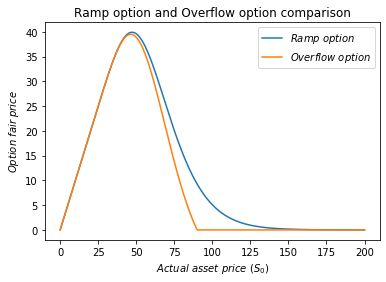

In [67]:
K, r, sigma, T, L = 80, 0.1, 0.2, 2, 90
S0 = np.linspace(0.01, 200, 1000)
Q0 = overflow_price(S0, K, r, sigma, T, L)
R0 = ramp_price(S0, K, r, sigma, T)
plt.figure()
plt.plot(S0, R0, label='$Ramp\ option$')
plt.plot(S0, Q0, label='$Overflow\ option$')
plt.xlabel(r'$Actual\ asset\ price\ (S_0)$')
plt.ylabel(r'$Option\ fair\ price$')
plt.title(r'Ramp option and Overflow option comparison')
plt.legend() 
plt.show()

In [21]:
#i) Both options have same price, RT depends on value of K and QT on value of L. K and L are 
    # close to each other, hence if S0 is far away from L to the left, they are essentially
    #same options.
#ii) When S0 approaches L from the left, otions drop in price, however, overflow option price 
    #tends to drop quicker because if asset price ever crosses L to the right, QT is zero.
#iii) and iv) Graph of Q0 must be zero to the right of L as its payoff is zero in all cases. 
    # R0 continues to drop as S0 crossed L to the right(L>K), although asset price can drop
    # and non-zero payoff is possible.

#### Q5(c)

Find the conjectured value $Q_0$ of an Overflow option using the function you created in part (b) above, for the case $S_0=70$, $r=0.1$, $\sigma=0.2$, $T=2$, $K=80$, and $L=90$.

(i) Explore convergence of the monte carlo method thoroughly for these values.  Does it appear to converge to the result of the proposed formula?  If not, what do you observe?  (ii) Choose an example with $S_0<L<K$. What do you observe?  What does the numerical evidence suggest about the validity of the formula given in part (b)?

In [90]:
S0, r, sigma, T, K, L = 70, 0.1, 0.2, 2, 80, 90
print(overflow_price(S0, K, r, sigma, T, L))

19.785578773255153


In [91]:
def monte_carlo_estimates(S0, r, sigma, T, n, m, path_payoff_function):
    QT = np.zeros(m)
    for j in range(m):
        S = gbm(S0, r, sigma, T, n)[1]
        VT = path_payoff_function(S)
        QT[j] = VT
    averages = np.cumsum(QT)/np.array(range(1, m+1)) 
    estimates = np.exp(-r*T)*averages
    return estimates

Simulation 0 final estimate of price 20.976508357835733
Simulation 1 final estimate of price 20.967363161046684
Simulation 2 final estimate of price 20.870834321799144


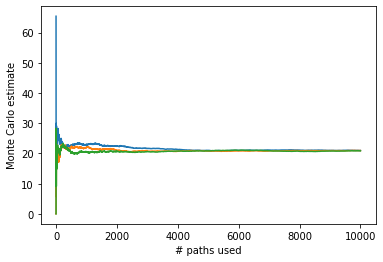

In [95]:
S0, r, sigma, T, K, L = 70, 0.1, 0.2, 2, 80, 90
ovf = make_overflow_payoff(L,K)
n = 100
m = 10000

plt.figure()
plt.xlabel('# paths used')
plt.ylabel('Monte Carlo estimate')
for k in range(3):
    estimates = monte_carlo_estimates(S0, r, sigma, T, n, m, ovf)
    plt.plot(estimates)
    print('Simulation', k, 'final estimate of price', estimates[-1])
plt.show()

In [ ]:
#i) It does not appear to converge to the result of the given formula. It is close but slightly
 # higher.(about 1 currency unit). Using the monte carlo method we can see that it converges to 
 # stable result after approx. over 4000 paths.

7.58265042323848
Simulation 0 final estimate of price 11.670330096864072
Simulation 1 final estimate of price 11.788248023911638
Simulation 2 final estimate of price 11.788472112226788


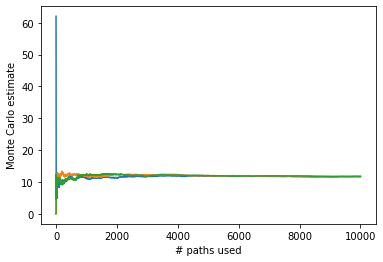

In [64]:
S0, r, sigma, T, K, L = 70, 0.1, 0.2, 2, 90, 80
print(overflow_price(S0, K, r, sigma, T, L))
ovf = make_overflow_payoff(L,K)
n = 100
m = 10000

plt.figure()
plt.xlabel('# paths used')
plt.ylabel('Monte Carlo estimate')
for k in range(3):
    estimates = monte_carlo_estimates(S0, r, sigma, T, n, m, ovf)
    plt.plot(estimates)
    print('Simulation', k, 'final estimate of price', estimates[-1])
plt.show()

In [ ]:
#ii) Using an example with S0 < L < K, final estimate of price is about 50% higher than price
   # calculated via given formula. Numerical evidence suggests that the proposed formula is not
   # valid.

**Q5(d)**

Consider the difference $U=R-Q$. Produce a graph of the quantity $U_0=R_0-Q_0$ against $S_0$.  By thinking about the equation $Q_T+U_T=R_T$, and the possible cases $\max(\underline{S})\ge L$ and $\max(\underline{S})<L$, define an option whose value is represented by $U_0$ (and, hence, by the graph).

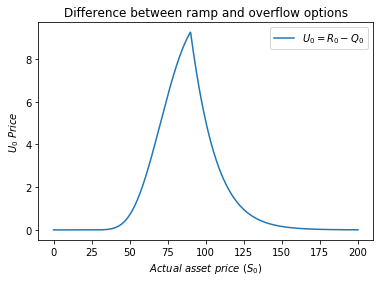

In [13]:
r, sigma, T, K, L = 0.1, 0.2, 2, 80, 90
S0 = np.linspace(0.01, 200, 1000)
Q0 = overflow_price(S0, K, r, sigma, T, L)
R0 = ramp_price(S0, K, r, sigma, T)
U0 = R0 - Q0
plt.figure()
plt.plot(S0,U0, label='$U_0=R_0-Q_0$')
plt.xlabel(r'$Actual\ asset\ price\ (S_0)$')
plt.ylabel(r'$U_0\ Price$')
plt.title(r'Difference between ramp and overflow options')
plt.legend() 
plt.show()

In [ ]:
#Going short on call and put with the same strike price K=L=90 (short Straddle) is the same value as the one
#represented by U0.